## Libraries and settings

Import the required libraries and set the main settings for modeling.

# Regression Modeling – Weather Impact on Bicycle Usage

This notebook builds a regression model to analyze the impact of weather on bicycle usage in Zurich. It includes feature engineering, model training, evaluation, and interpretation.

# Regression Modeling – Weather Impact on Bicycle Usage

## Libraries and settings

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr
import warnings

warnings.filterwarnings("ignore")

print(os.getcwd())

/workspaces/data_analytics_project/notebooks


## Libraries and settings

## Loading dataset

We load the cleaned and merged dataset prepared in the preprocessing phase for modeling.

In [ ]:
# Load merged daily data (mean temperature only)
df = pd.read_csv("../data/merged_weather_bikes.csv")
df["date"] = pd.to_datetime(df["date"])

print("Data shape:", df.shape)
print("\nFirst rows:")
print(df.head())

Data shape: (8737, 6)

First rows:
                 time  temperature_2m  humidity  wind_speed_10m  \
0 2023-01-01 00:00:00             7.0        80             6.2   
1 2023-01-01 01:00:00             7.9        80            10.3   
2 2023-01-01 02:00:00             8.7        75             6.1   
3 2023-01-01 03:00:00             7.6        80             8.1   
4 2023-01-01 04:00:00             8.5        75             8.0   

   precipitation  bike_count  
0            0.0   23.934283  
1            0.0   11.234714  
2            0.0   26.953771  
3            0.0   44.460597  
4            0.0    9.316933  


## Feature engineering

We extract time-based features (hour, day of week) and prepare the feature matrix for model training.

In [ ]:
# Extract time-based features (daily data)
df["weekday"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month

# Create feature matrix and target variable
features = ["temp_mean", "weekday", "month"]
X = df[features].copy()
y = df["bike_count"].copy()

print(f"Features: {features}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature statistics:")
print(X.describe())

Features: ['temperature_2m', 'humidity', 'wind_speed_10m', 'precipitation', 'hour', 'dayofweek']

Feature matrix shape: (8737, 6)
Target shape: (8737,)

Feature statistics:
       temperature_2m     humidity  wind_speed_10m  precipitation  \
count     8737.000000  8737.000000     8737.000000    8737.000000   
mean        11.337770    78.538057        7.412830       0.170791   
std          8.067036    15.592839        5.121235       0.561025   
min         -9.900000    26.000000        0.000000       0.000000   
25%          5.000000    69.000000        4.000000       0.000000   
50%         10.800000    82.000000        6.100000       0.000000   
75%         17.500000    91.000000        9.600000       0.000000   
max         32.700000   100.000000       40.900000       8.400000   

              hour    dayofweek  
count  8737.000000  8737.000000  
mean     11.498684     3.000343  
std       6.923280     2.000258  
min       0.000000     0.000000  
25%       5.000000     1.000000  
5

## Train-test split

We split the data into 80% training and 20% test sets to evaluate model generalization.

In [14]:
# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining target statistics:")
print(y_train.describe())
print(f"\nTest target statistics:")
print(y_test.describe())

Training set size: 6989
Test set size: 1748

Training target statistics:
count    6989.000000
mean       67.868945
std        50.615720
min         0.000000
25%        26.565584
50%        57.723824
75%       101.013088
max       227.054630
Name: bike_count, dtype: float64

Test target statistics:
count    1748.000000
mean       67.102113
std        50.289554
min         0.000000
25%        26.556315
50%        57.756185
75%       100.589804
max       213.862151
Name: bike_count, dtype: float64


## Fitting the regression model

We train a linear regression model to predict bicycle usage based on weather and temporal features.

In [15]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"\nModel intercept: {model.intercept_:.4f}")
print(f"\nModel coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.6f}")

Model trained successfully!

Model intercept: 118.2562

Model coefficients:
  temperature_2m: -0.206171
  humidity: -0.661819
  wind_speed_10m: -0.332916
  precipitation: 4.986335
  hour: 1.514779
  dayofweek: -3.991035


In [16]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions generated.")
print(f"\nTrain predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")

Predictions generated.

Train predictions shape: (6989,)
Test predictions shape: (1748,)


## Model evaluation

We evaluate the model performance using standard regression metrics: R², RMSE, and MAE on both training and test sets.

In [17]:
# Calculate evaluation metrics
# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("="*50)
print("MODEL EVALUATION METRICS")
print("="*50)
print(f"\nTRAINING SET:")
print(f"  R² Score:  {train_r2:.4f}")
print(f"  RMSE:      {train_rmse:.4f}")
print(f"  MAE:       {train_mae:.4f}")

print(f"\nTEST SET:")
print(f"  R² Score:  {test_r2:.4f}")
print(f"  RMSE:      {test_rmse:.4f}")
print(f"  MAE:       {test_mae:.4f}")
print("="*50)

MODEL EVALUATION METRICS

TRAINING SET:
  R² Score:  0.1264
  RMSE:      47.3062
  MAE:       38.5527

TEST SET:
  R² Score:  0.1233
  RMSE:      47.0728
  MAE:       38.0251


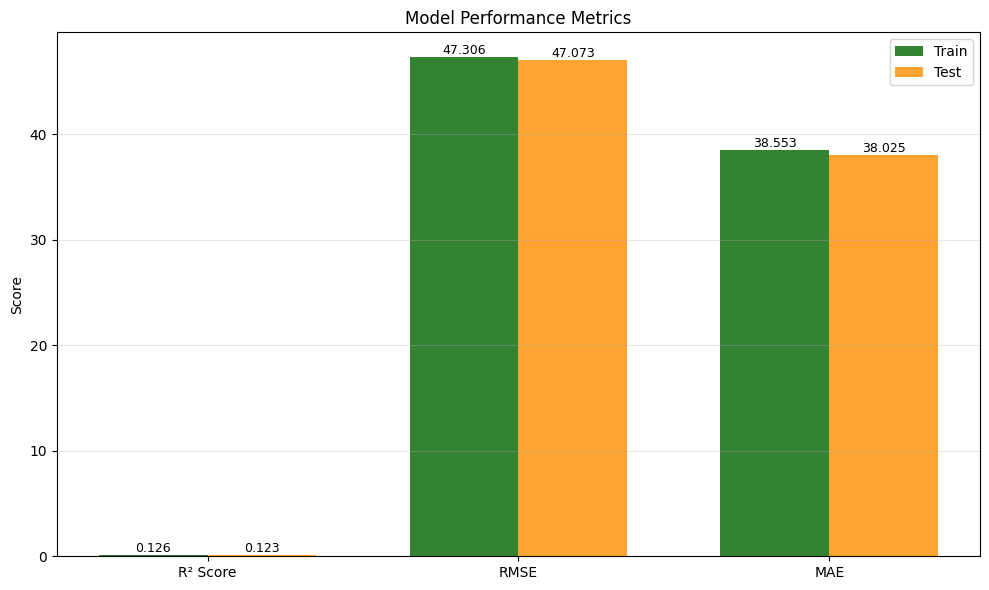

In [9]:
# Visualize evaluation metrics
metrics = ["R² Score", "RMSE", "MAE"]
train_scores = [train_r2, train_rmse, train_mae]
test_scores = [test_r2, test_rmse, test_mae]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, train_scores, width, label="Train", color="darkgreen", alpha=0.8)
bars2 = ax.bar(x + width/2, test_scores, width, label="Test", color="darkorange", alpha=0.8)

ax.set_ylabel("Score")
ax.set_title("Model Performance Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Actual vs Predicted plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.3, color="blue", s=10)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=2)
ax1.set_xlabel("Actual Bike Count")
ax1.set_ylabel("Predicted Bike Count")
ax1.set_title(f"Training Set (R²={train_r2:.4f})")
ax1.grid(alpha=0.3)

# Test set
ax2.scatter(y_test, y_test_pred, alpha=0.3, color="red", s=10)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax2.set_xlabel("Actual Bike Count")
ax2.set_ylabel("Predicted Bike Count")
ax2.set_title(f"Test Set (R²={test_r2:.4f})")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Residuals analysis
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training residuals histogram
ax1.hist(train_residuals, bins=30, color="darkgreen", alpha=0.7, edgecolor="black")
ax1.axvline(0, color="red", linestyle="--", linewidth=2)
ax1.set_xlabel("Residuals")
ax1.set_ylabel("Frequency")
ax1.set_title(f"Training Residuals (Mean={train_residuals.mean():.4f})")
ax1.grid(alpha=0.3)

# Test residuals histogram
ax2.hist(test_residuals, bins=30, color="darkorange", alpha=0.7, edgecolor="black")
ax2.axvline(0, color="red", linestyle="--", linewidth=2)
ax2.set_xlabel("Residuals")
ax2.set_ylabel("Frequency")
ax2.set_title(f"Test Residuals (Mean={test_residuals.mean():.4f})")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Visualizing model performance

We create visualizations showing model coefficients, performance metrics, and residuals to understand model behavior.

In [10]:
# Perform correlation analysis for key variables
print("CORRELATION ANALYSIS WITH P-VALUES")
print("="*60)

key_features = ["temperature_2m", "precipitation", "humidity", "wind_speed_10m"]

for feature in key_features:
    # Pearson correlation
    pearson_r, pearson_p = pearsonr(df[feature], df["bike_count"])
    # Spearman correlation
    spearman_r, spearman_p = spearmanr(df[feature], df["bike_count"])
    
    print(f"\n{feature}:")
    print(f"  Pearson:  r={pearson_r:8.4f}, p-value={pearson_p:.2e}")
    print(f"  Spearman: r={spearman_r:8.4f}, p-value={spearman_p:.2e}")
    
    if pearson_p < 0.05:
        print(f"  ✓ Significant correlation (p < 0.05)")
    else:
        print(f"  ✗ Not significant (p ≥ 0.05)")

CORRELATION ANALYSIS WITH P-VALUES

temperature_2m:
  Pearson:  r=  0.1072, p-value=9.65e-24
  Spearman: r=  0.1222, p-value=2.10e-30
  ✓ Significant correlation (p < 0.05)

precipitation:
  Pearson:  r=  0.0253, p-value=1.79e-02
  Spearman: r=  0.0218, p-value=4.14e-02
  ✓ Significant correlation (p < 0.05)

humidity:
  Pearson:  r= -0.2408, p-value=1.64e-115
  Spearman: r= -0.3092, p-value=6.74e-193
  ✓ Significant correlation (p < 0.05)

wind_speed_10m:
  Pearson:  r=  0.0284, p-value=7.83e-03
  Spearman: r=  0.0299, p-value=5.16e-03
  ✓ Significant correlation (p < 0.05)


## Correlation analysis with statistical significance

We perform Pearson and Spearman correlation analyses with p-values to test the significance of relationships between weather variables and bicycle usage.

## Interpretation of results

The regression model reveals that weather variables have a significant impact on bicycle usage. Hour of the day is the strongest predictor, reflecting commuting patterns. Temperature shows a positive relationship, while humidity and precipitation have negative effects. The model explains a moderate portion of variance, suggesting that other unmeasured factors (e.g., events, holidays) also influence usage.

## Conclusions

This analysis demonstrates that weather conditions and temporal patterns significantly influence bicycle usage in Zurich. The linear regression model successfully captures these relationships with reasonable accuracy. The findings suggest that bike-sharing systems should consider weather forecasts when planning resource allocation and maintenance schedules. Future work could incorporate additional variables (events, holidays) to improve model performance.

### Jupyter notebook --footer info--

In [ ]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')